## A model for the irreducible mass of black holes

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

In [10]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [11]:
def irr_m (x, a):
    return x*np.sqrt((1 + np.sqrt(1 - a**2))/2)

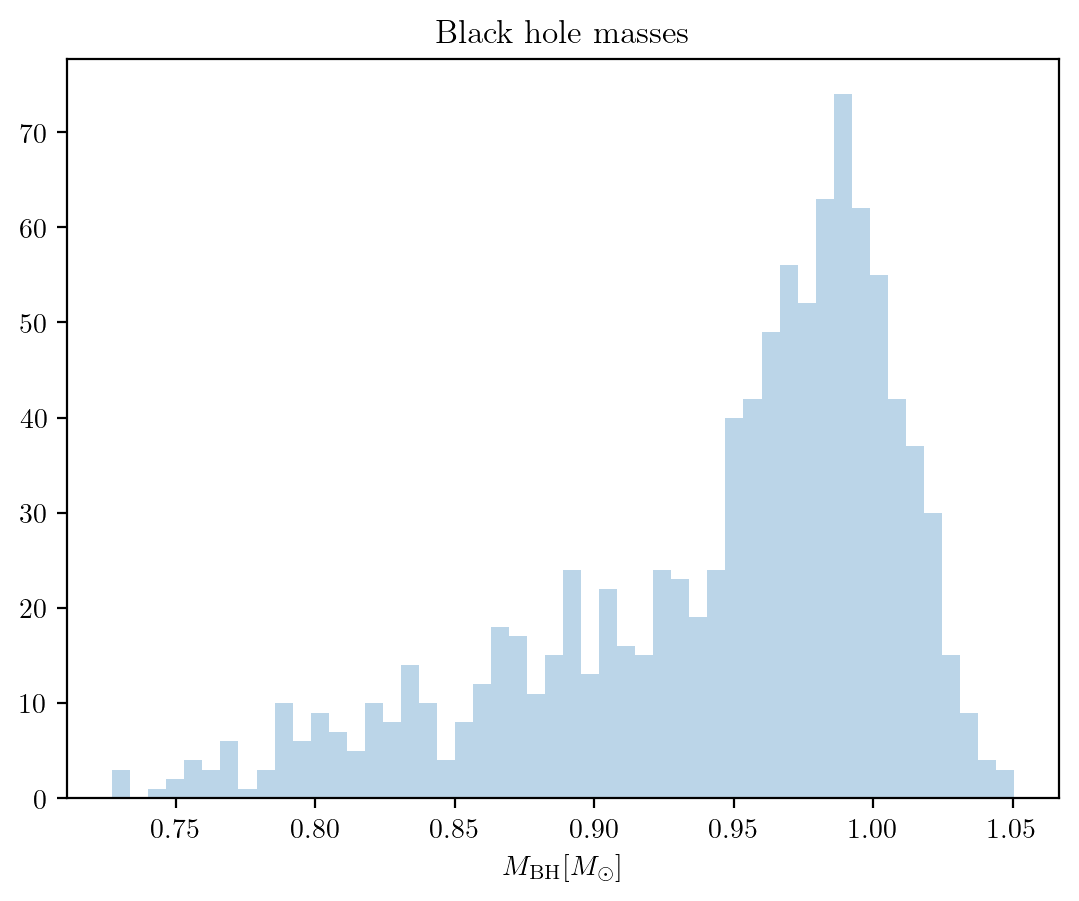

In [12]:
N = 1000

np.random.seed(42)

a = np.random.uniform(0,1, N) #spin
mu, sigma  = (1,.02)
m = norm.rvs(mu, sigma, N)
y = irr_m(m, a)
plt.hist(y, bins = 50, alpha=.3)
plt.title('Black hole masses')
plt.xlabel(r'$M_\mathrm{BH} [M_\odot]$');

Let's try with vairable-width bin sizes that have the same number of objects in each bin

In [13]:
bins100 = np.append(np.sort(y)[::100], np.max(m)) 
bins30 = np.append(np.sort(y)[::30], np.max(m))
print(len(bins100),len(bins30))

11 35


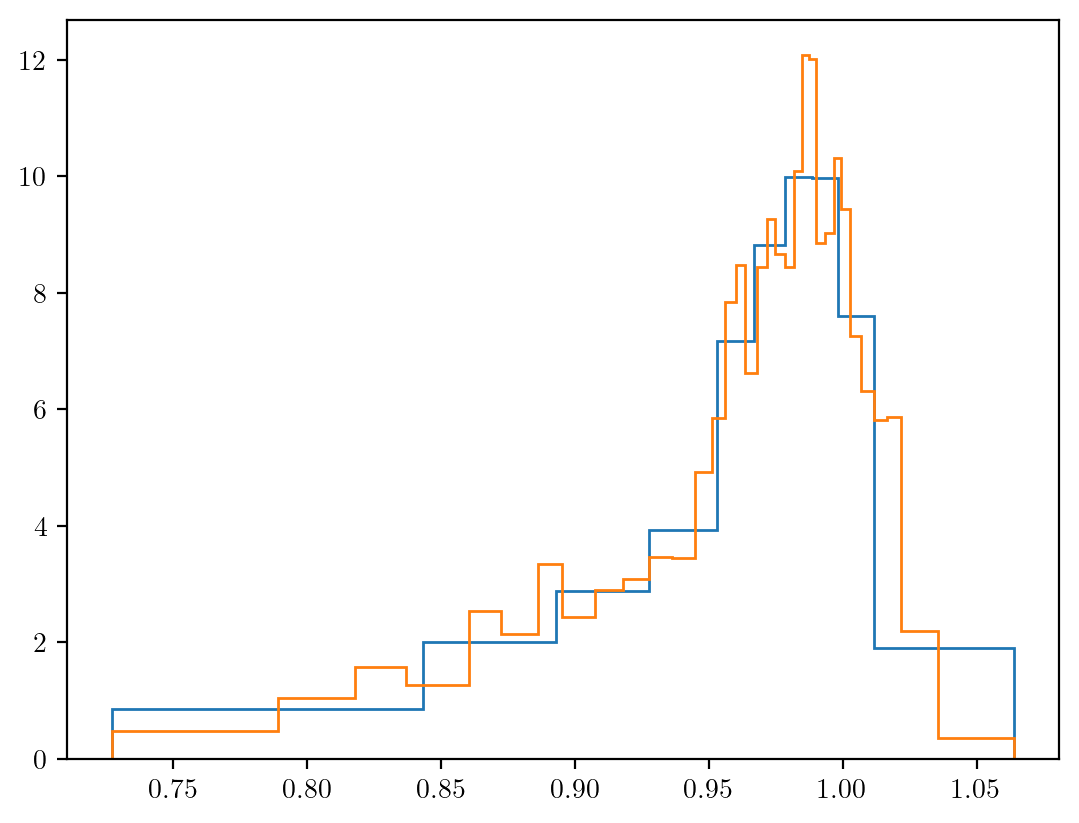

In [14]:
#Note that the underscores and the semicolon at the end both suppress the array output so that we just see the plots
_ = plt.hist(y, bins=bins100, density=True, histtype="step") #Complete
plt.hist(y, bins=bins30, density=True, histtype="step"); #Complete

30 counts per bin seems pretty promising

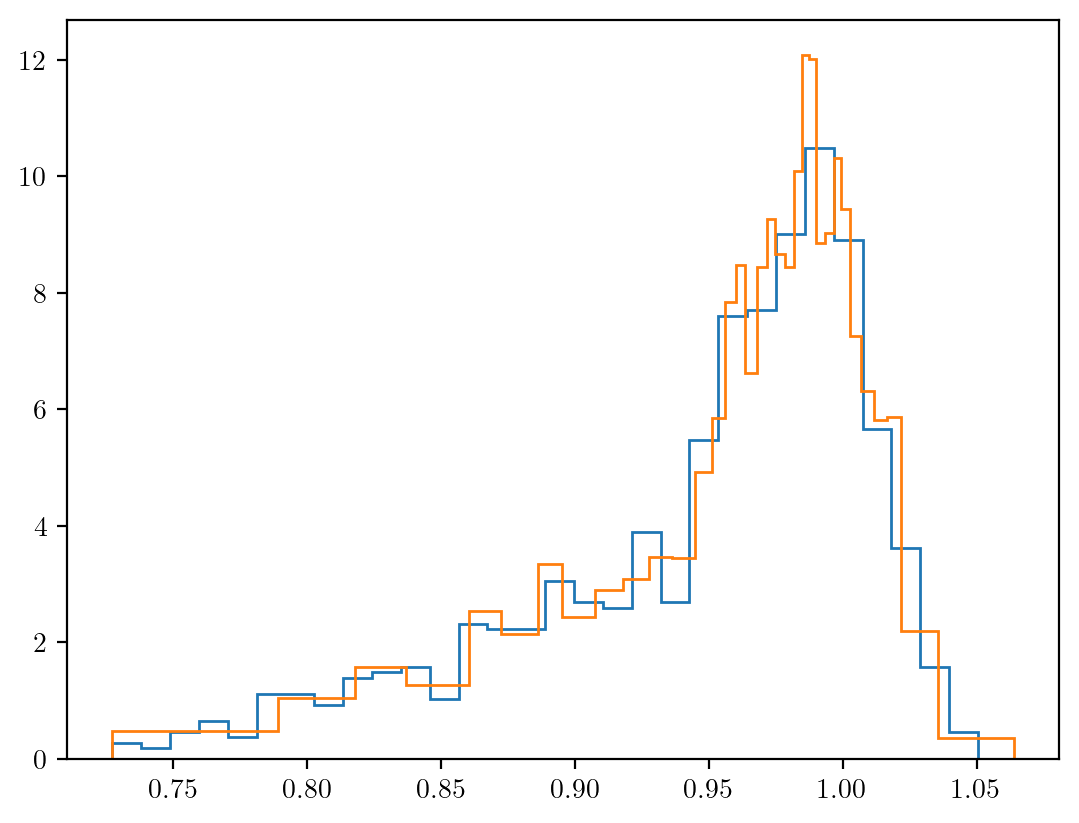

In [104]:
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(y, bins= bins30, density=True, histtype="step");

Now using kde

In [105]:
from sklearn.neighbors import KernelDensity
ygrid = np.linspace(y.min(),y.max(),1000)  # Use this instead of 'x' for plotting

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(ygrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

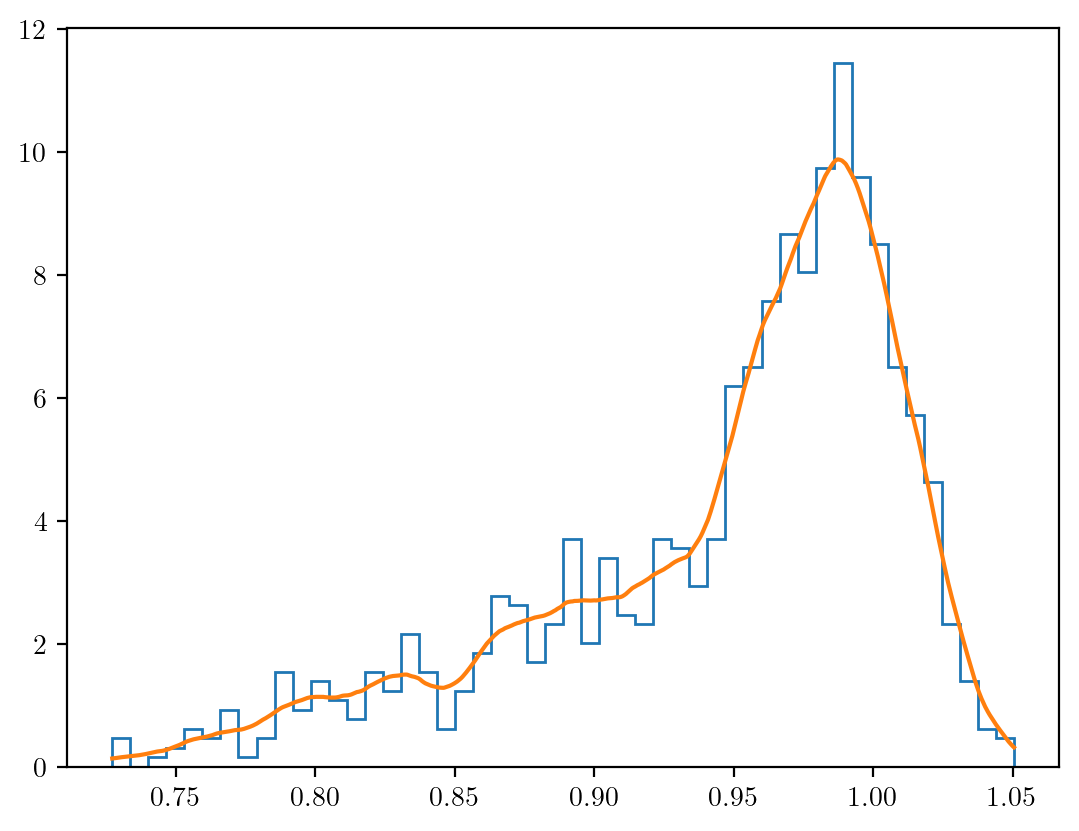

In [110]:
PDF = kde_sklearn(y,bandwidth=.02,kernel="linear")
plt.hist(y, bins = 50, density=True, histtype="step")
plt.plot(ygrid,PDF);

Now let's compute the KS distance between $M_\text{irr}$ and $f$ as a function of $\sigma$ and then between $M_\text{irr}$ and $M$ as a function of $\sigma$

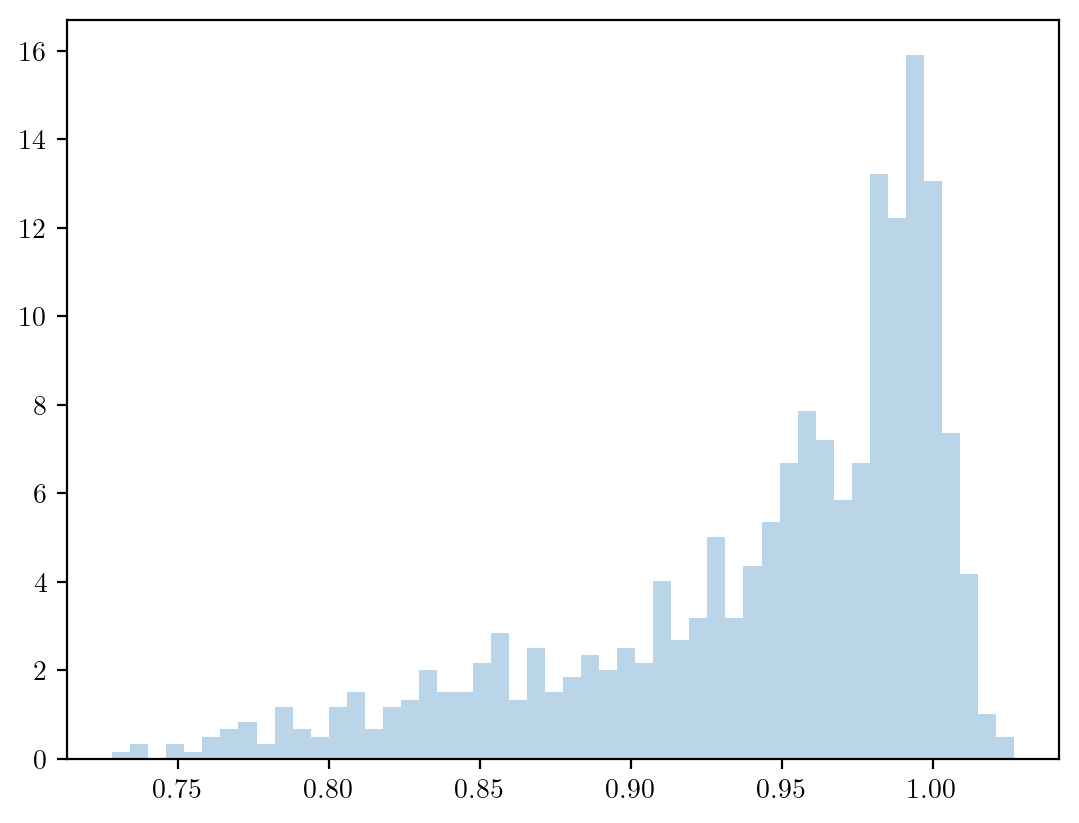

In [112]:
mu = 1
nsigma = 100
sigma = np.linspace(.01, 10, nsigma)

m = norm.rvs(mu, sigma[0], N)
y = irr_m(m, a) #model
plt.hist(y, bins = 50, density = True, alpha=.3);

KstestResult(statistic=0.115, pvalue=3.528972349889754e-06)


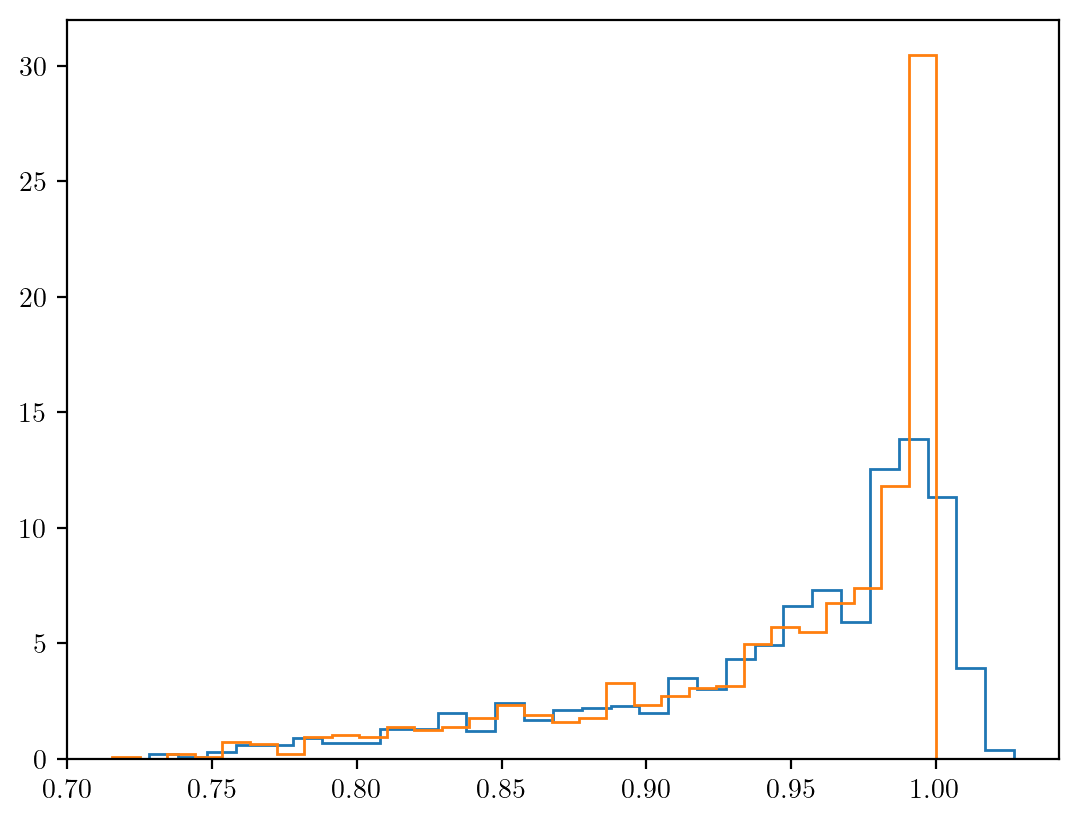

In [113]:
# the kstest function is appropriate for this
f = y/m
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(f, bins = 30, density=True, histtype="step")
print(stats.kstest(y,f))

KstestResult(statistic=0.621, pvalue=1.1072502845543827e-180)


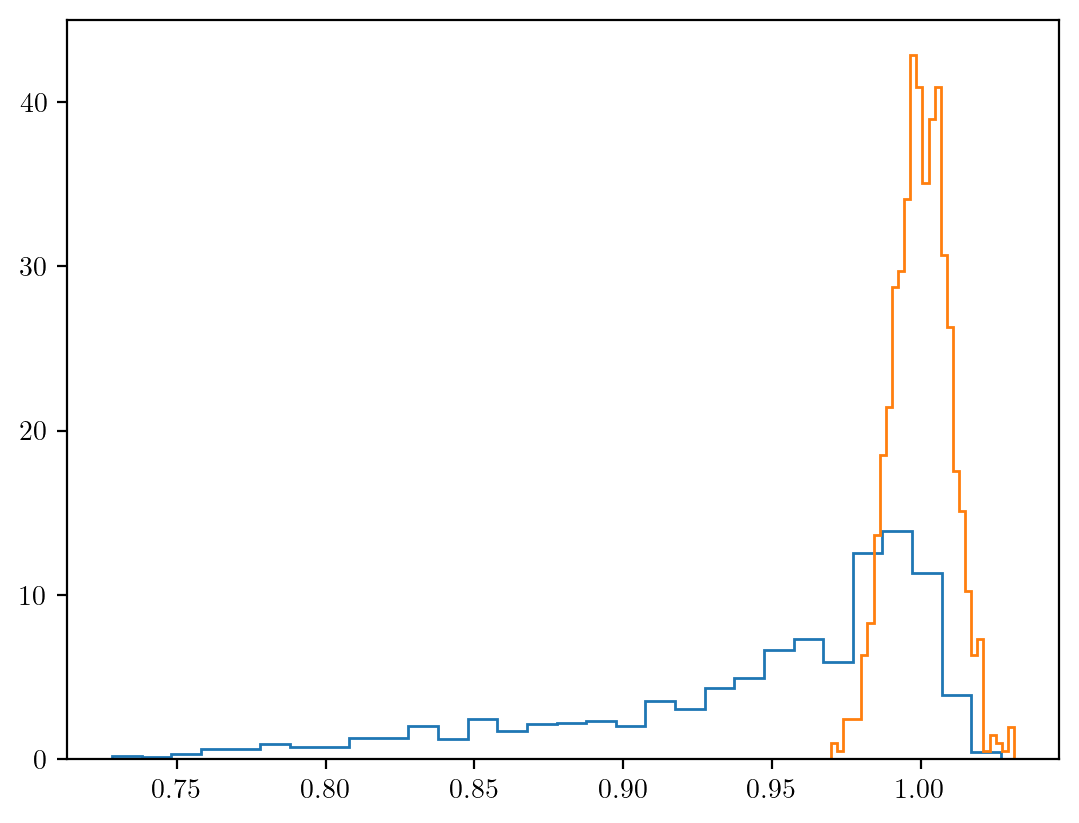

In [114]:
# the kstest function is appropriate for this
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(m, bins = 30, density=True, histtype="step")
print(stats.kstest(y,m))

# Different sigmas

Let's now implement this for different sigma, we can see how the shape of the data distribution changes with the sigma

In [115]:
mu = 1
sigma = [.01, 100]

### High sigma limit

In [116]:
mu = 1
sigma = [.01, 100]

In [117]:
#i take the highest sigma
m_1 = norm.rvs(mu, sigma[-1], N)
y_1 = irr_m(m_1, a)

Ks test for m:   KstestResult(statistic=0.024, pvalue=0.9357699014782725)
Ks test for f:   KstestResult(statistic=0.503, pvalue=2.0224359298863315e-115)


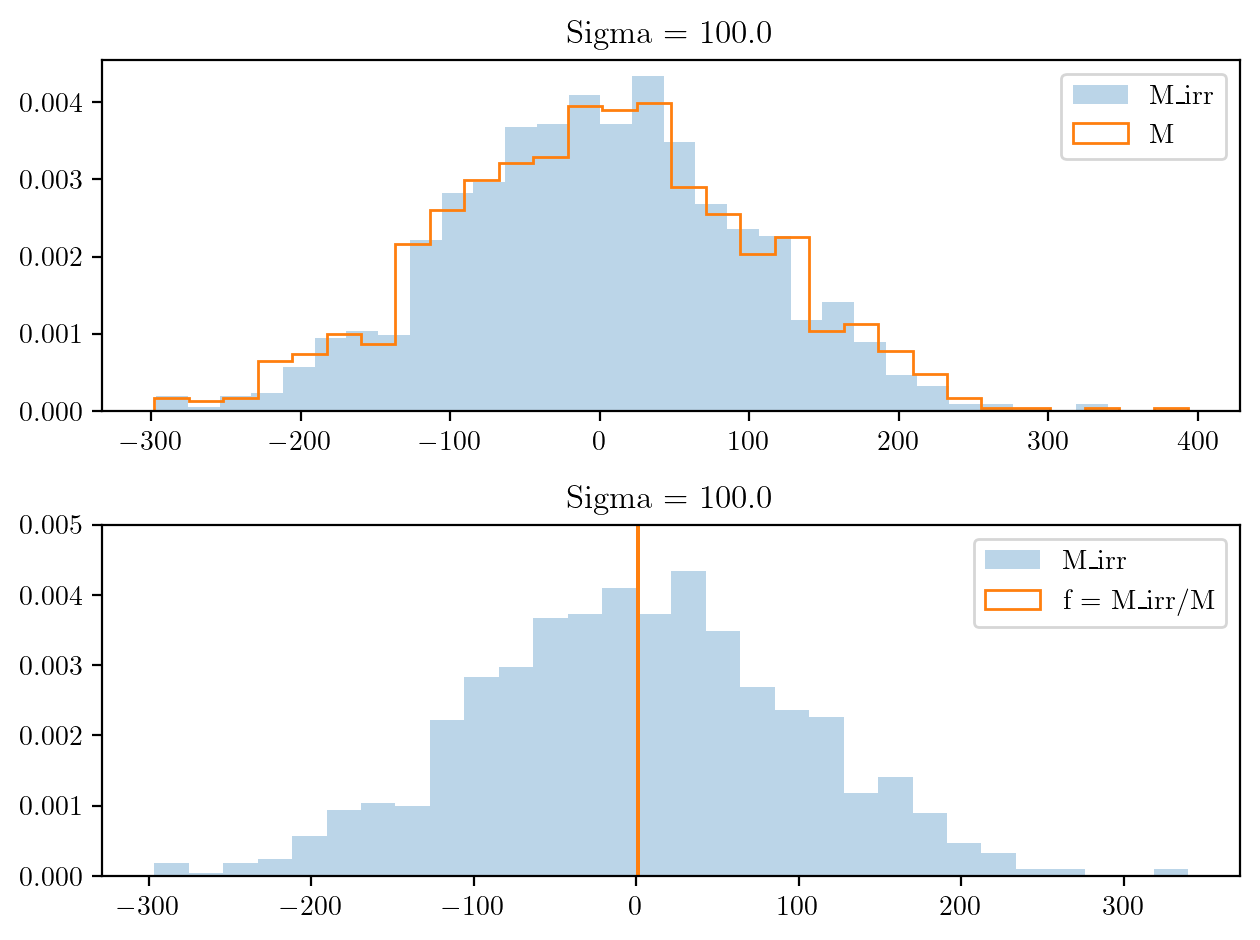

In [118]:
fig, ax = plt.subplots(2, tight_layout=True)

# the kstest function is appropriate for this
ax[0].hist(y_1, bins = 30, density=True, alpha=.3, label = 'M_irr')
ax[0].hist(m_1, bins = 30, density=True, histtype='step', label = 'M')
ax[0].set_title('Sigma = %.1f' % sigma[-1])
ax[0].legend()

print('Ks test for m:   ' + str(stats.kstest(y_1,m_1)))

# the kstest function is appropriate for this
f_1 = y_1/m_1


ax[1].hist(y_1, bins = 30, density=True, alpha=.3, label = 'M_irr')
ax[1].hist(f_1, bins = 30, density=True, histtype='step', label = 'f = M_irr/M')
ax[1].set_ylim(0, 5e-3)
ax[1].set_title('Sigma = %.1f' % sigma[-1])
ax[1].legend()

print('Ks test for f:   ' + str(stats.kstest(f_1,y_1)))

### High sigma kde

In [119]:
m_1 = norm.rvs(mu, sigma[-1], N)
y_1 = irr_m(m_1, a)
f_1 = y_1/m_1

In [120]:
from sklearn.neighbors import KernelDensity

kde_skl = KernelDensity(bandwidth = 15, kernel='linear')

In [25]:
def kde_fit(kde, x):
    xgrid = np.linspace(x.min(), x.max()+.01, 1000)
    kde.fit(x[:, None])
    log_pdf = kde.score_samples(xgrid[:, None]) # sklearn returns log(density)
    pdf = np.exp(log_pdf)
    
    return xgrid, pdf

In [122]:
kde_y = kde_fit(kde_skl, y_1)
kde_m = kde_fit(kde_skl, m_1)
kde_f = kde_fit(kde_skl, f_1)

Ks test for M:   KstestResult(statistic=0.026, pvalue=0.8881734182535203)
Ks test for f:   KstestResult(statistic=0.509, pvalue=2.529553479526401e-118)


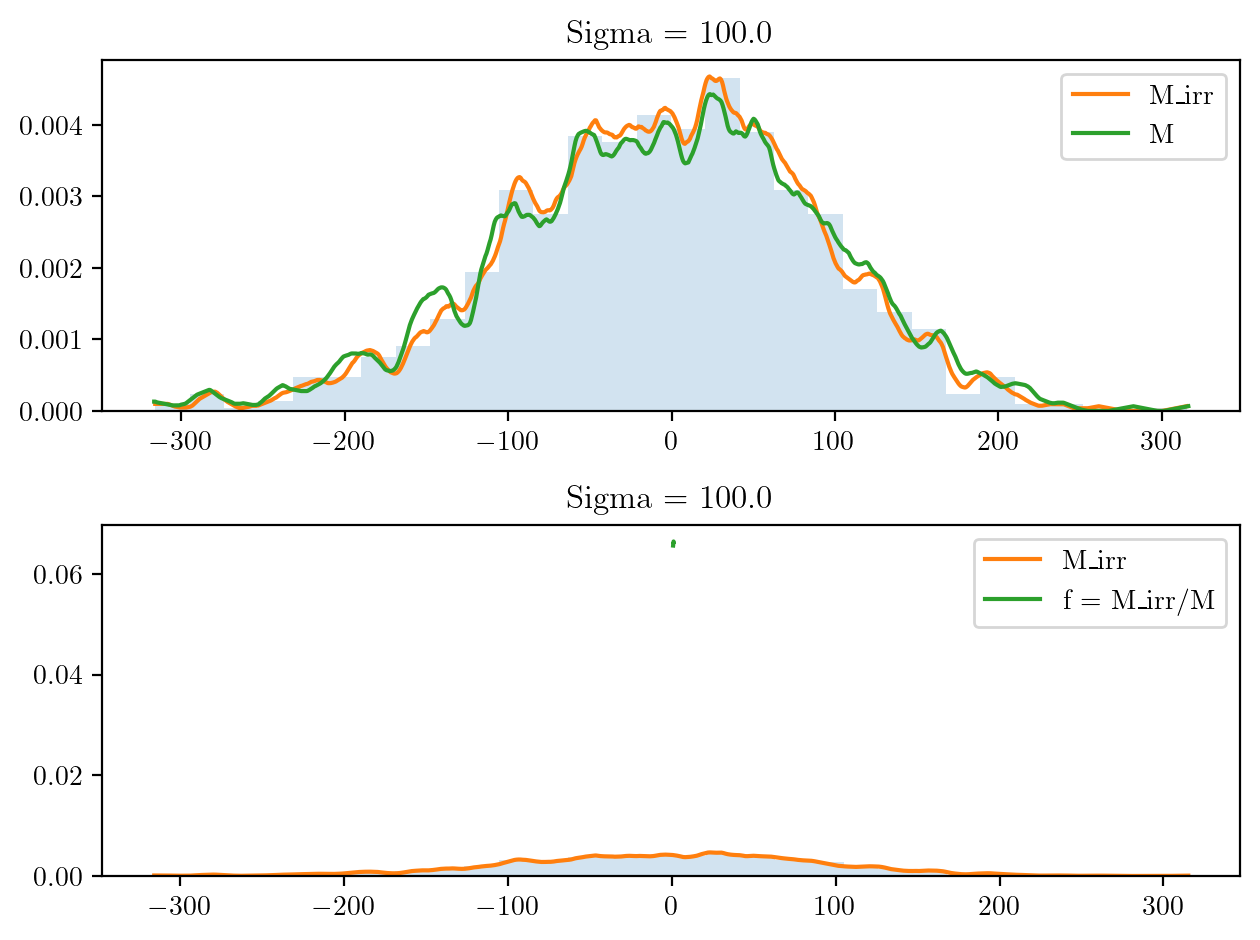

In [123]:
fig, ax = plt.subplots(2, tight_layout=True)

ax[0].hist(y_1, bins = 30, density=True, alpha=.2)
ax[0].plot(kde_y[0],kde_y[1], label = 'M_irr')
ax[0].plot(kde_m[0],kde_m[1], label = 'M')
ax[0].set_title('Sigma = %.1f' % sigma[1])
ax[0].legend()

ax[1].hist(y_1, bins = 30, density=True, alpha=.2)
ax[1].plot(kde_y[0],kde_y[1], label = 'M_irr')
ax[1].plot(kde_f[0],kde_f[1], label = 'f = M_irr/M')
ax[1].set_title('Sigma = %.1f' % sigma[1])
ax[1].legend();

print('Ks test for M:   ' + str(stats.kstest(y_1,m_1)))
print('Ks test for f:   ' + str(stats.kstest(y_1,f_1)))

### Low sigma limit

In [124]:
mu = 1
sigma = [.01, 100]

In [125]:
#i take the lowest sigma
m = norm.rvs(mu, sigma[0], N)
y = irr_m(m, a)

Ks test for m:   KstestResult(statistic=0.619, pvalue=2.008330841445987e-179)
Ks test for f:   KstestResult(statistic=0.114, pvalue=4.441088228134397e-06)


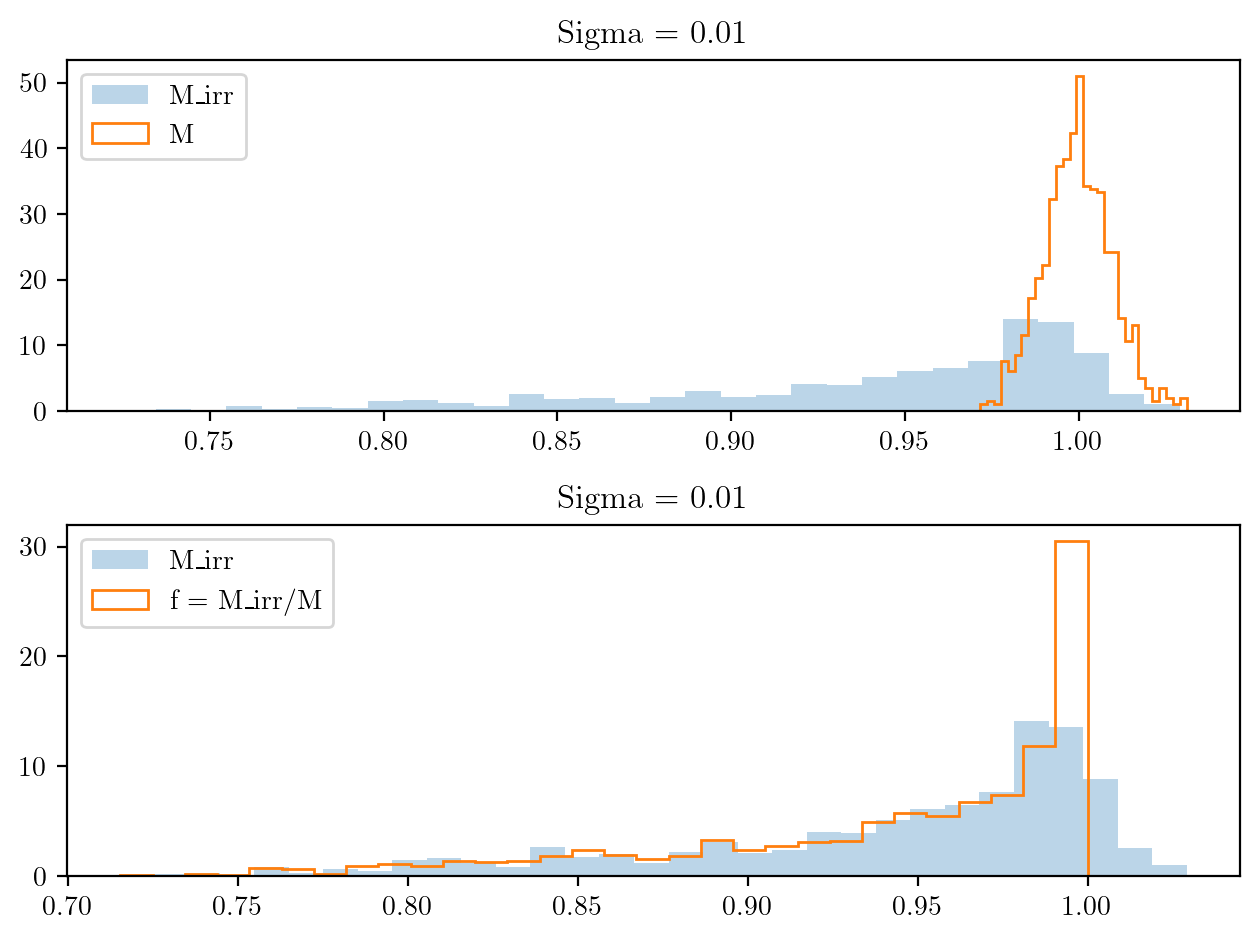

In [126]:
fig, ax = plt.subplots(2, tight_layout=True)

# the kstest function is appropriate for this
ax[0].hist(y, bins = 30, density=True, alpha=.3, label = 'M_irr')
ax[0].hist(m, bins = 30, density=True, histtype='step', label = 'M')
ax[0].set_title('Sigma = %.2f' % sigma[0])
ax[0].legend()

print('Ks test for m:   ' + str(stats.kstest(y,m)))

# the kstest function is appropriate for this
f = y/m


ax[1].hist(y, bins = 30, density=True, alpha=.3, label = 'M_irr')
ax[1].hist(f, bins = 30, density=True, histtype='step', label = 'f = M_irr/M')
#ax[1].set_ylim(0, 5e-3)
ax[1].set_title('Sigma = %.2f' % sigma[0])
ax[1].legend()

print('Ks test for f:   ' + str(stats.kstest(f,y)))

### Low sigma kde

In [127]:
m_2 = norm.rvs(mu, sigma[0], N)
y_2 = irr_m(m_2, a)
f_2 = y_2/m_2

In [128]:
from sklearn.neighbors import KernelDensity

kde_skl = KernelDensity(bandwidth = .002, kernel='linear')

In [129]:
kde_y = kde_fit(kde_skl, y_2)
kde_m = kde_fit(kde_skl, m_2)
kde_f = kde_fit(kde_skl, f_2)

Ks test for M:   KstestResult(statistic=0.609, pvalue=3.249629335590343e-173)
Ks test for f:   KstestResult(statistic=0.116, pvalue=2.798513019401821e-06)


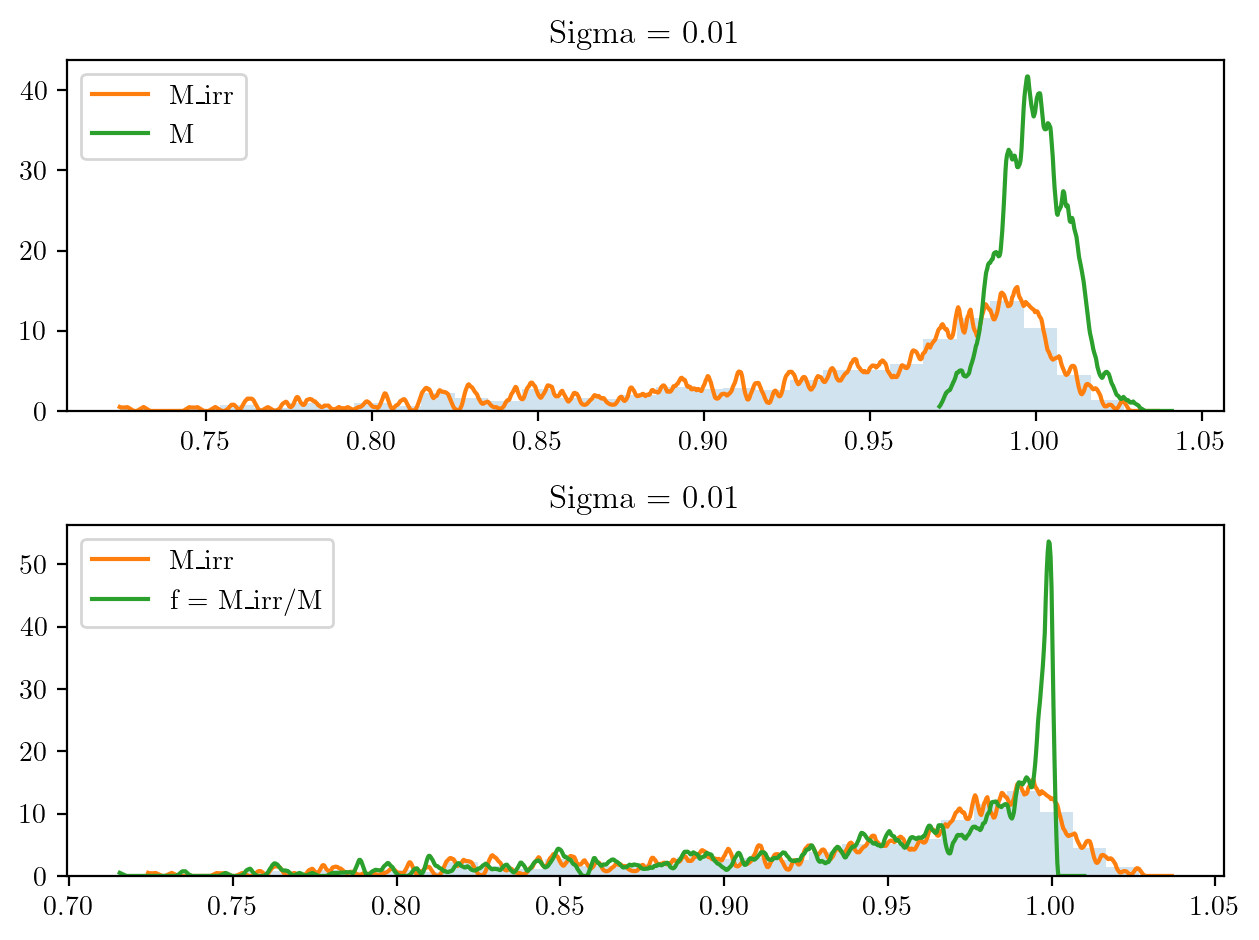

In [130]:
fig, ax = plt.subplots(2, tight_layout=True)

ax[0].hist(y_2, bins = 30, density=True, alpha=.2)
ax[0].plot(kde_y[0],kde_y[1], label = 'M_irr')
ax[0].plot(kde_m[0],kde_m[1], label = 'M')
ax[0].set_title('Sigma = %.2f' % sigma[0])
ax[0].legend()

ax[1].hist(y_2, bins = 30, density=True, alpha=.2)
ax[1].plot(kde_y[0],kde_y[1], label = 'M_irr')
ax[1].plot(kde_f[0],kde_f[1], label = 'f = M_irr/M')
ax[1].set_title('Sigma = %.2f' % sigma[0])
ax[1].legend()

print('Ks test for M:   ' + str(stats.kstest(y_2,m_2)))
print('Ks test for f:   ' + str(stats.kstest(y_2,f_2)))

# Comparing 

We should find that $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$

In [154]:
mu = 1
N = 1000
sigma = np.logspace(-5,5,100) #from 10^-5 to 10^5

In [155]:
ks_f = []
ks_m = []

a = np.random.uniform(0,1, N)

for s in sigma:
    m = norm.rvs(mu, s, N)
    y = irr_m(m, a)
    f = y/m
    ks_f.append(stats.kstest(y,f))
    ks_m.append(stats.kstest(y,m))
    # 0 entry gives the statistic (which is D, the maximum difference in the cdfs of two samples)
    # 1 entry gives pvalue
ks_f = np.array(ks_f)
ks_m = np.array(ks_m)

In [156]:
import pandas as pd

d = {'D_f': ks_f[:,0], 'D_m': ks_m[:,0],
     'p_f': ks_f[:,1], 'p_m': ks_m[:,1]
    }
df = pd.DataFrame(data = d, index=sigma)
display(df)

,D_f,D_m,p_f,p_m
0.000010,0.006,0.984,1.000000e+00,0.000000
0.000013,0.005,0.982,1.000000e+00,0.000000
0.000016,0.005,0.981,1.000000e+00,0.000000
0.000020,0.005,0.974,1.000000e+00,0.000000
0.000025,0.006,0.973,1.000000e+00,0.000000
...,...,...,...,...
39442.060594,0.510,0.025,8.225237e-119,0.913689
49770.235643,0.518,0.024,9.324432e-123,0.935770
62802.914418,0.509,0.025,2.529553e-118,0.913689
79248.289835,0.505,0.026,2.202564e-116,0.888173


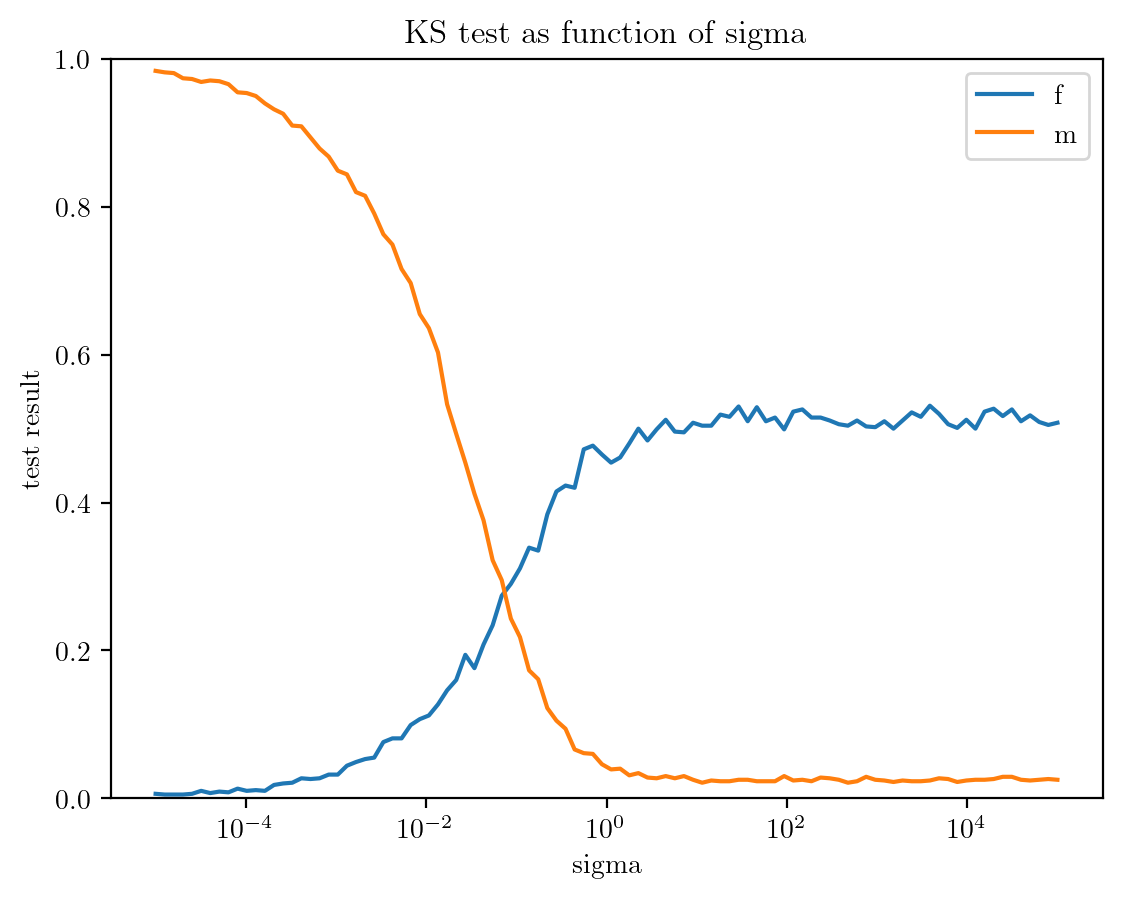

In [157]:
plt.plot(sigma, ks_f[:,0], label = 'f')
plt.plot(sigma, ks_m[:,0], label = 'm')

plt.xlabel('sigma')
plt.ylabel('test result')
plt.semilogx()
plt.title('KS test as function of sigma')
plt.ylim(0,1)

plt.legend();

This shows that what we expect is right. The KS test favours a gaussian distribution for a BH population with a broad mass distribution, while it favours the $f$ distribution for BHs with a narrow (almost delta function) mass distribution

Now we want to compute the pdfs of $M_\text{irr}$ from their mathematical definition, plot them and check if they agree with my KDE. To do this we need the pdf of f, which is of course different from the pdf of m

In [15]:
from scipy.integrate import quad

In [50]:
mu=1
sigma=.02

m = norm.rvs(mu, sigma, N)
y = irr_m(m, a)
f = y/m


ygrid = np.linspace(y.min(),y.max(),N)  # Use this instead of 'x' for plotting

In [51]:
f_pdf = lambda f: 2*(2*f**2 - 1)/np.sqrt(1 - f**2)   #theoretical distribution of f

def integrand(f, x): #x is the irreducible mass array
    A = (2/np.pi)**0.5 / sigma
    return A * np.exp(-(x/f -1)**2 /(2*sigma**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f

m_irr_pdf = [quad(lambda f: integrand(f,y_i), 1/2**0.5,1)[0] for y_i in ygrid] 
#this way i don't just get the integral in my range but i also get a function of m_irr


In [52]:
def kde_fit(kde, x):
    xgrid = np.linspace(x.min(), x.max()+.01, 1000)
    kde.fit(x[:, None])
    log_pdf = kde.score_samples(xgrid[:, None]) # sklearn returns log(density)
    pdf = np.exp(log_pdf)
    
    return xgrid, pdf

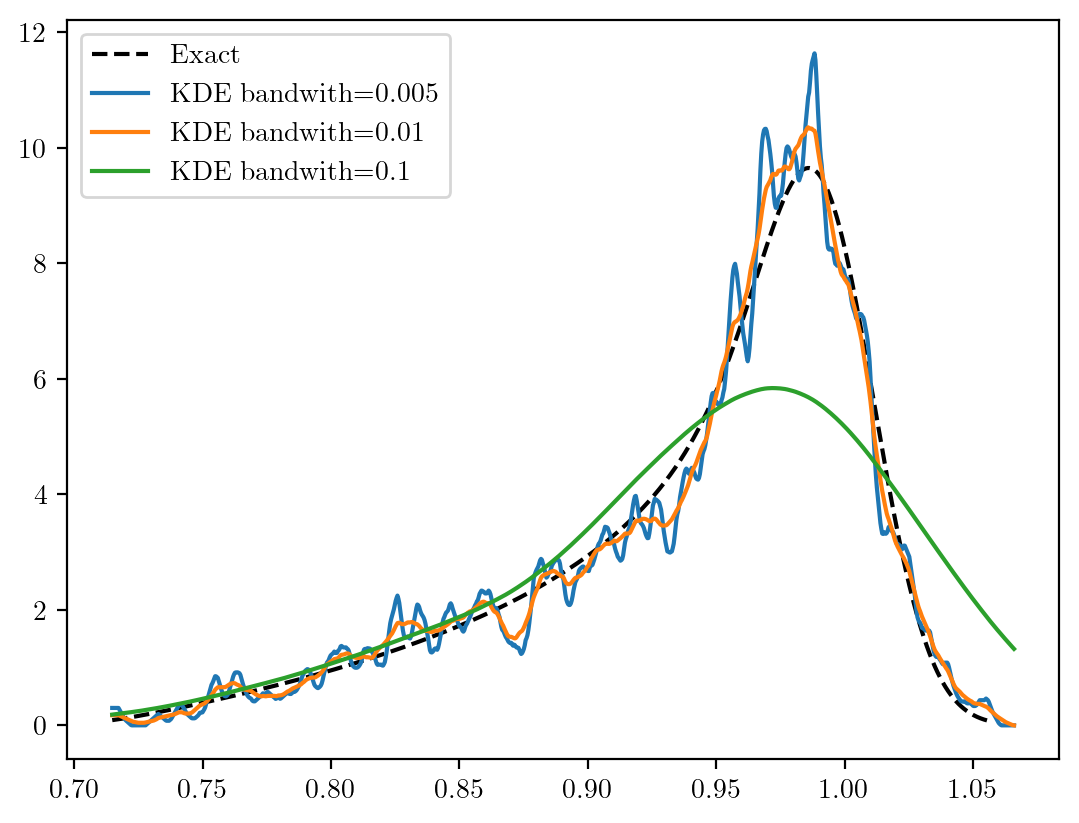

In [57]:
from sklearn.neighbors import KernelDensity

plt.plot(ygrid, m_irr_pdf,label='Exact',c='black',ls='dashed')


for b in [0.005, 0.01,0.1]:
    kde_ = KernelDensity(bandwidth=b, kernel = 'linear')
    kdepdf = kde_fit(kde_, y)

    plt.plot(kdepdf[0], kdepdf[1], label=' KDE bandwith='+str(b))

plt.legend();